# River and well interaction 

# Example description
### Spatial configuration
There is two simulated aquifer which are separated by an aquitard. The model grid consists of 15 rows, 10 columns, and 3 layers.  Uniform grid spacing with a row and column width of 100.0 meters. The top layer is positioned at an elevation of 15.0 meters, while the bottom layers are situated at elevations of -5.0, -10.0, and -15.0 meters, respectively.
### Temporal discretization
The model is designed for a simulation period of 10 days, divided into 120 time steps per stress period, with a time step multiplier of 1.0. The simulation is repeated for a total of 3 periods. The model operates in days as time units and meters as length units.
### Layer Hydraulic properties 
Initial hydraulic conductivity values for the three layers are set at 0.5, 0.000006, and 0.5, respectively.
The vertical anisotropy ratios for the layers are specified as 0.1, 0.2, and 0.3, indicating differences in hydraulic conductivity in the vertical direction.
### Storage properties 
The specific yield is set at 0.2, representing the volumetric ratio of water that drains under the influence of gravity.The specific storage is specified as 0.000001, representing the compressibility of the aquifer.
### Boundary Conditions 
The model starts with an initial hydraulic head of 10.0 meters across the entire domain. 
Two constant head boundaries are established at specific locations: one at the intersection of the first layer, first row, and first column and another at the intersection of the last layer, last row, and last column, each set at a constant head of 10.0 meters.
### Solute transport conditions 
The initial concentration of the substance being transported within the groundwater system set to 1.
The model simulates a point source contamination: at cell (Layer 0, Row 5, Column 1), the initial concentration is set to 10.
Similarly, at cell (Layer 0, Row 6, Column 1), the initial concentration is also set to 10.
### River Boundary specifications 
rivlay: Specifies the layer number for each river cell. In this case, all river cells are situated in Layer 0, denoting their vertical position within the aquifer system.  
rivrow and rivcol: Arrays indicating the horizontal positions of the river cells in terms of rows and columns within the model grid.  
rivstg: Represents the stage or water level of each river cell. The values gradually vary between 13 and 14 across the river cells.  
rivbot: Defines the elevation of the river bottom for each corresponding river cell, showing a variation between elevations of 7 and 10.  
rivcnd: Indicates the conductance values associated with the river cells. In this case, a uniform conductance value of 0.05 is assigned to all river cells.  

# Start setting up the model 

### Magic commands - auto reload of the model each time 

In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%autoreload 2

### Import from pymf6tools the functions to run, get and visualize simulation results

In [11]:
from pymf6tools.make_model import run_simulation, get_simulation
import numpy as np 
import os 

In [12]:
from pymf6tools.plotting import show_heads, show_well_head, show_concentration, show_bcs, show_bot_elevations, show_river_stages, contour_bot_elevations, plot_spec_discharge 

## Set model path and name 

In [13]:
dir = os.getcwd()
model_name = "example_1"
model_path = os.path.abspath(os.path.join(dir, 'models', model_name))
print(model_path)

C:\TUBAF\MODSIMPLE2\pymf6tools\tests\models\example_1


## Run simulation

In [14]:
%%time 
run_simulation(model_path)

CPU times: total: 250 ms
Wall time: 11 s


### Inspect visualization tools

In [15]:
show_bcs?

Signature:
show_bcs(
    model_path,
    exe_model,
    title='Boundary Conditions',
    bc_names=('chd', 'wel', 'riv'),
    show_grid=True,
)
Docstring: Show location of boundary conditions.
File:      c:\tubaf\modsimple2\pymf6tools\src\pymf6tools\plotting.py
Type:      function

### Inspect the parameters by importing the model results 

In [16]:
sim = get_simulation(model_path, model_name)
ml = sim.get_model()
dis = ml.get_package('dis') 
riv = ml.get_package('riv')
chd =ml.get_package('chd')

In [17]:
sim.get_model

<bound method MFSimulation.get_model of sim_name = modflowsim
sim_path = C:\TUBAF\MODSIMPLE2\pymf6tools\tests\models\example_1
exe_name = example_1

###################
Package mfsim.nam
###################

package_name = mfsim.nam
filename = mfsim.nam
package_type = nam
model_or_simulation_package = simulation
simulation_name = modflowsim


###################
Package example_1.tdis
###################

package_name = example_1.tdis
filename = example_1.tdis
package_type = tdis
model_or_simulation_package = simulation
simulation_name = modflowsim


###################
Package example_1
###################

package_name = example_1
filename = example_1.ims
package_type = ims
model_or_simulation_package = simulation
simulation_name = modflowsim


@@@@@@@@@@@@@@@@@@@@
Model example_1
@@@@@@@@@@@@@@@@@@@@

name = example_1
model_type = gwf6
version = mf6
model_relative_path = 

###################
Package dis
###################

package_name = dis
filename = example_1.dis
package_type =

In [18]:
get_simulation?

Signature: get_simulation(model_path, exe_name=None, verbosity_level=0)
Docstring: Get simulation for a model.
File:      c:\tubaf\modsimple2\pymf6tools\src\pymf6tools\make_model.py
Type:      function

In [19]:
riv.data_list

[,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 {internal}
 (27),
 {internal}
 (rec.array([((0, 1, 0), 13.        , 0.05,  7.        ),
            ((0, 1, 2), 13.03846154, 0.05,  7.11538462),
            ((0, 2, 1), 13.07692308, 0.05,  7.23076923),
            ((0, 3, 2), 13.11538462, 0.05,  7.34615385),
            ((0, 4, 3), 13.15384615, 0.05,  7.46153846),
            ((0, 5, 3), 13.19230769, 0.05,  7.57692308),
            ((0, 4, 4), 13.23076923, 0.05,  7.69230769),
            ((0, 5, 5), 13.26923077, 0.05,  7.80769231),
            ((0, 6, 6), 13.30769231, 0.05,  7.92307692),
            ((0, 7, 7), 13.34615385, 0.05,  8.03846154),
            ((0, 8, 7), 13.38461538, 0.05,  8.15384615),
            ((0, 7, 8), 13.42307692, 0.05,  8.26923077),
            ((0, 8, 9), 13.46153846, 0.05,  8.38461538),
            ((0, 8, 9), 13.5       , 0.05,  8.5       ),
            ((0, 9, 10), 13.53846154, 0.05,  8.61538462),
            ((0, 10, 11), 13.57692308, 0.05,  8.73076923),
            ((0, 11, 12), 

In [20]:
dis.data_list

[{internal}
 ('meters'),
 ,
 ,
 ,
 ,
 {internal}
 (3),
 {internal}
 (30),
 {internal}
 (20),
 {constant 5.0},
 {constant 5.0},
 {constant 15.0},
 Layer_1{constant -5.0}
 Layer_2{constant -10.0}
 Layer_3{constant -15.0},
 ]

In [21]:
chd.data_list

[,
 ,
 ,
 ,
 ,
 ,
 ,
 ,
 {internal}
 (60),
 {internal}
 (rec.array([((0, 0, 0), 10.), ((0, 1, 0), 10.), ((0, 2, 0), 10.),
            ((0, 3, 0), 10.), ((0, 4, 0), 10.), ((0, 5, 0), 10.),
            ((0, 6, 0), 10.), ((0, 7, 0), 10.), ((0, 8, 0), 10.),
            ((0, 9, 0), 10.), ((0, 10, 0), 10.), ((0, 11, 0), 10.),
            ((0, 12, 0), 10.), ((0, 13, 0), 10.), ((0, 14, 0), 10.),
            ((0, 15, 0), 10.), ((0, 16, 0), 10.), ((0, 17, 0), 10.),
            ((0, 18, 0), 10.), ((0, 19, 0), 10.), ((0, 20, 0), 10.),
            ((0, 21, 0), 10.), ((0, 22, 0), 10.), ((0, 23, 0), 10.),
            ((0, 24, 0), 10.), ((0, 25, 0), 10.), ((0, 26, 0), 10.),
            ((0, 27, 0), 10.), ((0, 28, 0), 10.), ((0, 29, 0), 10.),
            ((0, 0, 19), 10.), ((0, 1, 19), 10.), ((0, 2, 19), 10.),
            ((0, 3, 19), 10.), ((0, 4, 19), 10.), ((0, 5, 19), 10.),
            ((0, 6, 19), 10.), ((0, 7, 19), 10.), ((0, 8, 19), 10.),
            ((0, 9, 19), 10.), ((0, 10, 19), 10.), ((0, 1

## Visualization of Input and Output - e.g. Boundary conditions and Heads 

### Boundary Conditions 
Note that you should change the "bc_names" according to the boundary conditions present in the simulation.  
<span style="color:blue">'chd'</span> Constant-head boundary  
<span style="color:blue">'riv-1'</span> River boundary

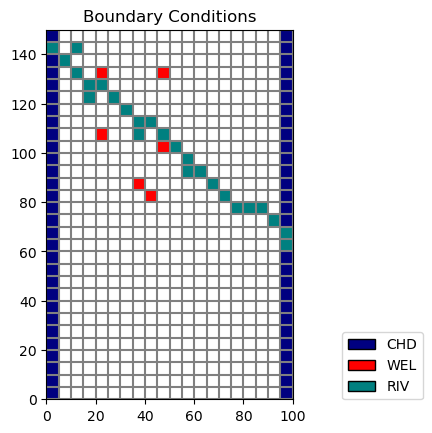

In [22]:
show_bcs(model_path, exe_model=None)

In [23]:
show_bcs?

Signature:
show_bcs(
    model_path,
    exe_model,
    title='Boundary Conditions',
    bc_names=('chd', 'wel', 'riv'),
    show_grid=True,
)
Docstring: Show location of boundary conditions.
File:      c:\tubaf\modsimple2\pymf6tools\src\pymf6tools\plotting.py
Type:      function

### Bottom elevation of the layers - Interactive graph
max_top: maximum elevation of the layer selected  
max_botm: maximum depth of the layer selected  
layer: choose layer of the model 

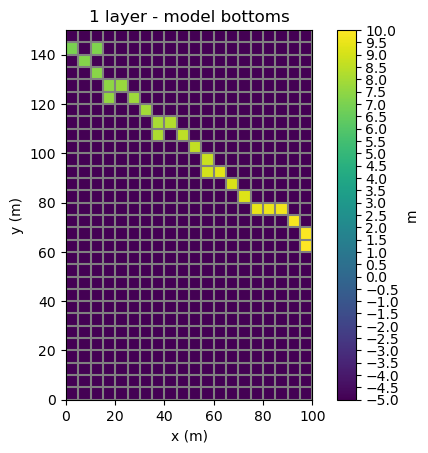

In [24]:
show_bot_elevations(model_path, exe_model=None, max_top=15., max_botm=-15., layer=1)

### Specific Discharge - Interactive graph (layer and time)
Specify the layer and time of the simulation to be visualized.

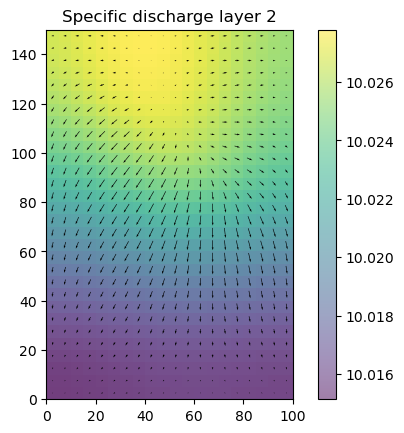

In [25]:
plot_spec_discharge(model_path, exe_model=None , layer=2, times = 300)

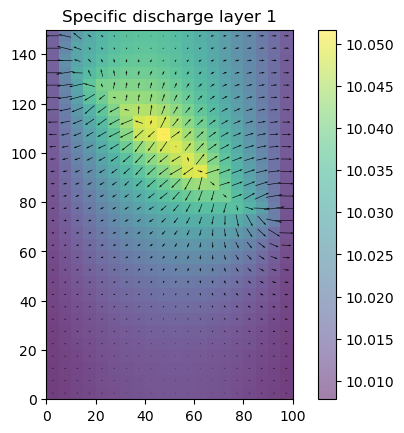

In [26]:
plot_spec_discharge(model_path, exe_model=None, layer=1, times = 300)

### Bottom elevations with Countour lines - Interactive layer 
Specify the layer to be visualized.

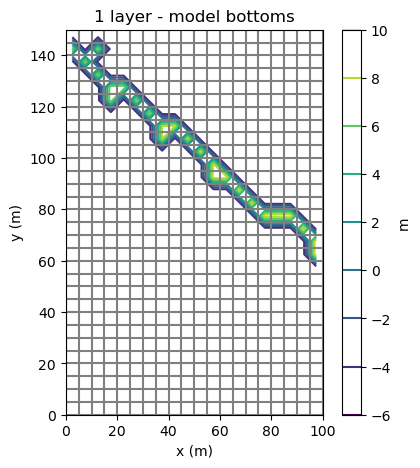

In [27]:
contour_bot_elevations(model_path, exe_model=None, max_top= -15, max_botm=15, layer=1)

### River Stages - Interactive layer and time period 
Specify the layer and the time period to be plotted. 

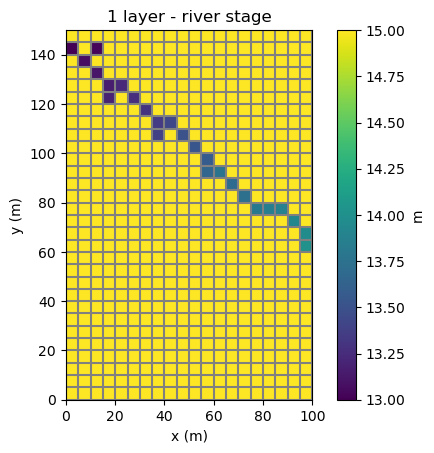

In [28]:
show_river_stages(model_path, exe_model=None, layer=1, time_period=3)

### Groundwater level 

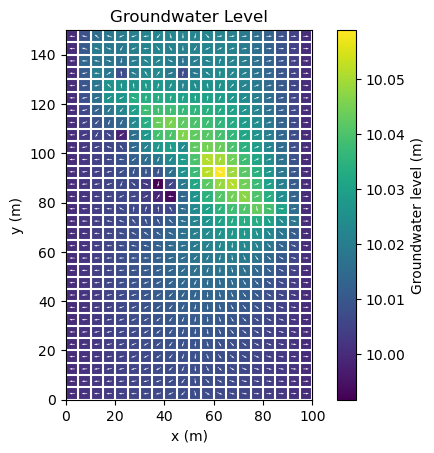

In [29]:
show_heads(model_path, exe_model=None, show_wells=False, title='Groundwater Level')

### Well withdraw

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('int32'), dtype((numpy.record, [('node', '<i4'), ('node2', '<i4'), ('q', '<f8'), ('qx', '<f8'), ('qy', '<f8'), ('qz', '<f8')]))) -> None

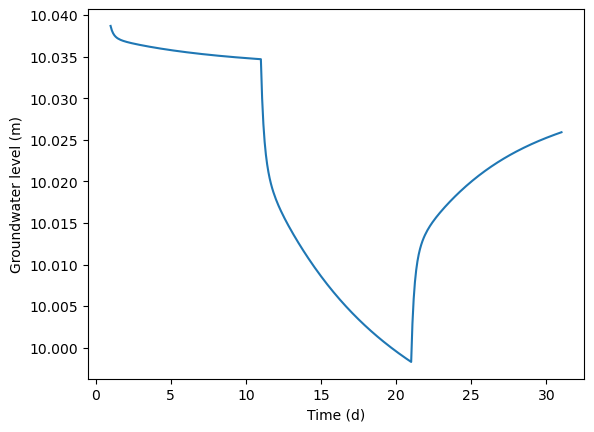

In [30]:
show_well_head(wel_coords= (0, 8, 4), model_path=model_path, exe_model=None, times=2)